In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
from google.colab import files
files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [0]:
pd.set_option('display.max_rows',14000)

In [0]:
Job_post=pd.read_csv('fake_job_postings.csv', encoding='latin')

In [0]:
Job_post=Job_post.dropna()

In [6]:
(Job_post.isnull().sum()/(Job_post.shape[0]))*100

job_id                 0.0
title                  0.0
location               0.0
department             0.0
salary_range           0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
dtype: float64

In [0]:
Droplabels=['job_id','location','salary_range']
Droplabels1=['function']
Job_post=Job_post.drop(Droplabels1, axis=1)

In [0]:
Job_post['AllText']=Job_post['department']+" "+Job_post['company_profile']+" "+Job_post['description']+" "+Job_post['requirements']+" "+Job_post['benefits']

In [10]:
Job_post

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,AllText
6,Head of Content (m/f),ANDROIDPIT,"Founded in 2009, theÂ Fonpit AGÂ rose with its...",Your Responsibilities:Â Manage the English-spe...,Your Know-How:Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â ...,Your Benefits:Â Being part of a fast-growing c...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,0,"ANDROIDPIT Founded in 2009, theÂ Fonpit AGÂ ro..."
15,VP of Sales - Vault Dragon,Sales,Jungle Ventures is the leading Singapore based...,About Vault DragonÂ Vault Dragon is Dropbox fo...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,0,Sales Jungle Ventures is the leading Singapore...
23,"Vice President, Sales and Sponsorship (Busines...",Businessfriend.com,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,0,"Businessfriend.com WDM Group is an innovative,..."
98,IC&E Technician,Oil & Energy,Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,1,Oil & Energy Â Â Â Â Â Â Â Â Â Â Â ...
102,Marketing Administrator,Marketplace,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,0,Marketplace Renewable Energy and Environmental...
134,Senior Business Development Manager,Sales and Business Development,MarketInvoice is one of the most high-profile ...,BACKGROUNDA senior sales and account managemen...,5-10 years sales experience in B2B solution sa...,Based in our Manchester officeCompetitive basi...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,0,Sales and Business Development MarketInvoice i...
153,Senior Project Manager,Production,"Neverbland is a team of designers, developers ...",Some of us are born with the ability to multi ...,2-3 years agency experience in a Producer/Proj...,"Work in a dynamic, creative environment.Learn ...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,0,"Production Neverbland is a team of designers, ..."
160,Field Services Supervisor,Field Operations,"Dairy, food and beverage processors work withi...","W.M. Sprinkman designs, builds and installs st...",5-7 years of experience in fabrication and/or ...,We provide a solid benefits package with healt...,0,0,0,Full-time,Associate,High School or equivalent,Mechanical or Industrial Engineering,0,"Field Operations Dairy, food and beverage proc..."
179,Internal Recruiter,Playfair Capital,Playfair Capital is an early stage technology ...,You will be responsible for hiring across a po...,Previous recruitment experience in fast growth...,Work will an awesome group of companies and be...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,0,Playfair Capital Playfair Capital is an early ...
197,Software developer,Software development,"Being into the IT domain for over 4 years, Wal...","Is coding just a task for you, or something to...",Min. 1 year in Web DevelopmentÂ,In-house product development with a chance to ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,0,Software development Being into the IT domain ...


In [0]:
Job_post=Job_post.dropna()

In [12]:
Job_post.head()

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,AllText
6,Head of Content (m/f),ANDROIDPIT,"Founded in 2009, theÂ Fonpit AGÂ rose with its...",Your Responsibilities:Â Manage the English-spe...,Your Know-How:Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â ...,Your Benefits:Â Being part of a fast-growing c...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,0,"ANDROIDPIT Founded in 2009, theÂ Fonpit AGÂ ro..."
15,VP of Sales - Vault Dragon,Sales,Jungle Ventures is the leading Singapore based...,About Vault DragonÂ Vault Dragon is Dropbox fo...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,0,Sales Jungle Ventures is the leading Singapore...
23,"Vice President, Sales and Sponsorship (Busines...",Businessfriend.com,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,0,"Businessfriend.com WDM Group is an innovative,..."
98,IC&E Technician,Oil & Energy,Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,1,Oil & Energy Â Â Â Â Â Â Â Â Â Â Â ...
102,Marketing Administrator,Marketplace,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,0,Marketplace Renewable Energy and Environmental...


In [0]:
Droplabels3=['company_profile','description','requirements','benefits']
Job_post=Job_post.drop(Droplabels3, axis=1)

In [0]:
def stripping(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|.@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)

In [0]:
Job_post['ALL']=Job_post['AllText'].apply(stripping)

In [0]:
Job_post=Job_post.drop('AllText', axis=1)

In [17]:
Job_post.head()

,title,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent,ALL
6,Head of Content (m/f),ANDROIDPIT,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,0,androidpit founded the fonpit rose with its in...
15,VP of Sales - Vault Dragon,Sales,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,0,sales jungle ventures the leading singapore ba...
23,"Vice President, Sales and Sponsorship (Busines...",Businessfriend.com,0,1,0,Full-time,Executive,Unspecified,Internet,0,businessfriend com wdm group innovative forwar...
98,IC&E Technician,Oil & Energy,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,1,oil energy staffing amp recruiting done right ...
102,Marketing Administrator,Marketplace,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,0,marketplace renewable energy and environmental...


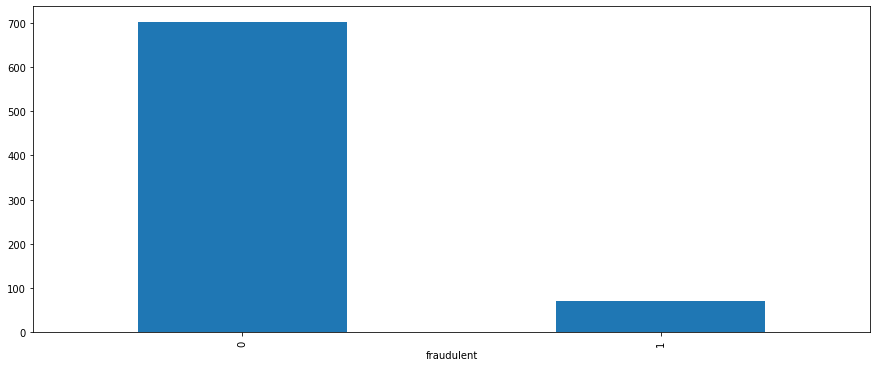

In [43]:
Job_post.groupby('fraudulent').size().plot(kind='bar',figsize=(15,6))

In [18]:
Job_post.shape

(774, 11)

In [19]:
(Job_post.isnull().sum()/(Job_post.shape[0]))*100

title                  0.0
department             0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
fraudulent             0.0
ALL                    0.0
dtype: float64

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [0]:
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(Job_post['ALL'])

In [0]:
Job_post_ML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [24]:
Job_post_ML.head()

,aaa,aab,aac,aaccb,aace,aad,aaec,aaf,aat,abaea,abandonment,abap,abb,abbb,abc,abdbb,abe,abel,aber,aberdeen,abilities,abilitiesconstantly,abilitiesempathy,abilitiesideally,ability,abilityability,abilitybs,abilityquote,abilityto,able,abo,aboard,aboutppd,abreast,abroad,abroadchoose,abroadthe,abroadwork,absences,absolute,...,young,younger,youread,yourselfgenerate,youth,youthful,youtrack,youtube,youwe,youwork,youyou,yoy,yoyo,yrs,ysi,yuhwen,yui,zabbix,zappos,zeal,zealand,zealandabout,zealot,zen,zend,zendesk,zenithoptimedia,zero,ziel,zoho,zone,zones,zoopla,zopa,zukunft,zum,zur,zusammenarbeitest,zusammenbringt,zutrifft
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.056188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041916,0.0,0.0,0.0,0.070769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065119,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.041063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035498,0.0,0.0,0.0,0.089901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Job_post['title']=Le.fit_transform(Job_post['title'])
Job_post['department']=Le.fit_transform(Job_post['department'])
Job_post['employment_type']=Le.fit_transform(Job_post['employment_type'])
Job_post['required_experience']=Le.fit_transform(Job_post['required_experience'])
Job_post['required_education']=Le.fit_transform(Job_post['required_education'])
Job_post['industry']=Le.fit_transform(Job_post['industry'])


In [0]:
Job_post_ML['telecommuting']=Job_post['telecommuting']
Job_post_ML['has_company_logo']=Job_post['has_company_logo']
Job_post_ML['has_questions']=Job_post['has_questions']
Job_post_ML['fraudulent']=Job_post['fraudulent']
Job_post_ML['title']=Job_post['title']
Job_post_ML['department']=Job_post['department']
Job_post_ML['employment_type']=Job_post['employment_type']
Job_post_ML['required_experience']=Job_post['required_experience']
Job_post_ML['required_education']=Job_post['required_education']
Job_post_ML['industry']=Job_post['industry']

In [0]:
Job_post_ML['fraudulent']=Job_post['fraudulent']

In [0]:
Mod=Job_post_ML['fraudulent'].mode()[0]
Job_post_ML['fraudulent']=Job_post_ML['fraudulent'].fillna(Mod)

In [33]:
cols=['telecommuting','has_company_logo','department','employment_type','required_education','industry']
for i in cols:
    print(Job_post_ML[i].isnull().sum())

0
0
0
0
0
0


In [0]:
Mod=Job_post_ML['telecommuting'].mode()[0]
Job_post_ML['telecommuting']=Job_post_ML['telecommuting'].fillna(Mod)
Mod=Job_post_ML['has_company_logo'].mode()[0]
Job_post_ML['has_company_logo']=Job_post_ML['has_company_logo'].fillna(Mod)
Mod=Job_post_ML['has_questions'].mode()[0]
Job_post_ML['has_questions']=Job_post_ML['has_questions'].fillna(Mod)
Mod=Job_post_ML['fraudulent'].mode()[0]
Job_post_ML['fraudulent']=Job_post_ML['fraudulent'].fillna(Mod)
Mod=Job_post_ML['title'].mode()[0]
Job_post_ML['title']=Job_post_ML['title'].fillna(Mod)
Mod=Job_post_ML['department'].mode()[0]
Job_post_ML['department']=Job_post_ML['department'].fillna(Mod)
Mod=Job_post_ML['employment_type'].mode()[0]
Job_post_ML['employment_type']=Job_post_ML['employment_type'].fillna(Mod)
Mod=Job_post_ML['required_experience'].mode()[0]
Job_post_ML['required_experience']=Job_post_ML['required_experience'].fillna(Mod)
Mod=Job_post_ML['required_education'].mode()[0]
Job_post_ML['required_education']=Job_post_ML['required_education'].fillna(Mod)
Mod=Job_post_ML['industry'].mode()[0]
Job_post_ML['industry']=Job_post_ML['industry'].fillna(Mod)



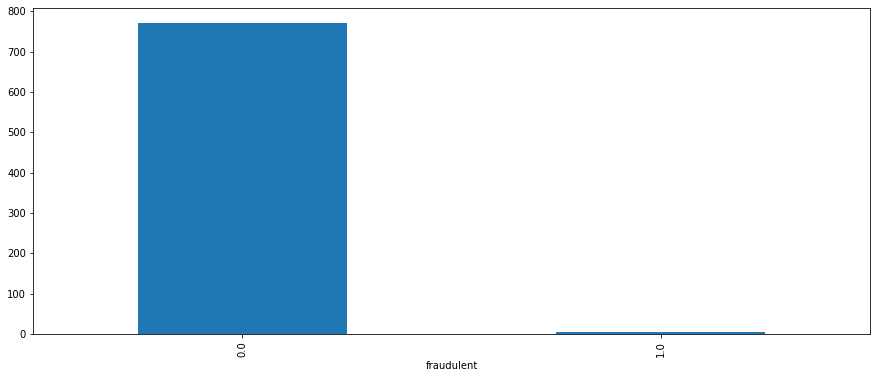

In [45]:
Job_post_ML.groupby('fraudulent').size().plot(kind='bar', figsize=(15,6))

In [0]:
Target=['fraudulent']
y=Job_post_ML[Target].values
Job_post_ML=Job_post_ML.drop(labels='fraudulent', axis=1)
Predictors=Job_post_ML.columns
X=Job_post_ML[Predictors].values

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
Lda=LinearDiscriminantAnalysis(n_components=1)
reduced_data = Lda.fit(X,y).transform(X)

In [50]:
reduced_data [:]

array([[-3.26865375e+00],
       [-3.26897553e+00],
       [-3.26930535e+00],
       [-3.26877521e+00],
       [-3.26918332e+00],
       [-3.26656934e+00],
       [-3.26850902e+00],
       [-3.26985810e+00],
       [-3.27058194e+00],
       [-3.26903994e+00],
       [-3.27824664e+00],
       [-3.26951894e+00],
       [-3.27034208e+00],
       [-3.26077273e+00],
       [-3.26949293e+00],
       [-3.26749341e+00],
       [-3.26918760e+00],
       [-3.26690612e+00],
       [-3.26918341e+00],
       [-3.26433653e+00],
       [-3.26916868e+00],
       [-3.27118915e+00],
       [-3.26886080e+00],
       [-3.15632660e+00],
       [-3.27078946e+00],
       [-3.26999255e+00],
       [-3.26892220e+00],
       [-3.26900918e+00],
       [-3.26931973e+00],
       [-3.26949072e+00],
       [-3.24581477e+00],
       [-3.26886936e+00],
       [-3.26888976e+00],
       [-3.26942684e+00],
       [-3.26921745e+00],
       [-3.26350705e+00],
       [-3.26886743e+00],
       [-3.26916380e+00],
       [-3.2

In [0]:
principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1'])
finalDf = pd.concat([principalDf,Job_post_ML['fraudulent']], axis = 1)

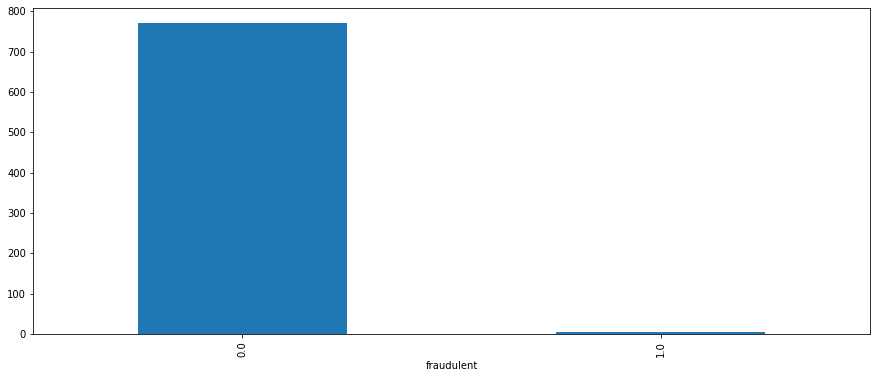

In [58]:
finalDf.groupby('fraudulent').size().plot(kind='bar', figsize=(15,6))

In [0]:
from sklearn.model_selection import train_test_split
Predictors=['PC-1']
Target=['fraudulent']
X=finalDf[Predictors].values
y=finalDf[Target].values


In [61]:
print(X.shape)
print(y.shape)

(774, 1)
(774, 1)


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3500)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(619, 1)
(155, 1)
(619, 1)
(155, 1)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [0]:
def RandomForest_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            RFC =RandomForestClassifier(max_depth=3, n_estimators=300,criterion='entropy')
            predictModel=RFC.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy) 

In [69]:
length,AVGAccuracy=RandomForest_classifier(X,y)
Sum_of_Acc_Dtree=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[231   0]
 [  0   2]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is

In [0]:
def Logistic_Regression(Data1,Data2):
    from sklearn.linear_model import LogisticRegression
    Test_size=[0.30,0.20,0.23,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,50,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgf=LogisticRegression(C=2,penalty='l2', solver='liblinear')
            predictModel=lgf.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)  

In [71]:
length,AVGAccuracy=Logistic_Regression(X,y)
Sum_of_Acc=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[231   0]
 [  0   2]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 50
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is  

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
def Adaboost_Classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            DTC=DecisionTreeClassifier(max_depth=5)
            ADA = AdaBoostClassifier(n_estimators=150, base_estimator=DTC ,learning_rate=0.01)
            predictModel=ADA.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,ADA ) 

In [75]:
length,AVGAccuracy,AD=Adaboost_Classifier(X,y)
Sum_of_Acc_Dtree=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[231   0]
 [  0   2]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is

In [0]:
from xgboost import XGBClassifier

In [0]:
def Xgboost_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            xgb=XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')
            predictModel=xgb.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,xgb )

In [78]:
length,AvgACC,XG=Xgboost_classifier(X,y)
Sum_of_Acc_Dtree=sum(AvgACC)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       231
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       233
   macro avg       0.50      0.50      0.50       233
weighted avg       0.98      0.99      0.99       233

[[231   0]
 [  2   0]]
Accuracy is  0.99
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
def GradientBoostClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GBC=GradientBoostingClassifier(max_depth=5,learning_rate=0.01,n_estimators=300,)
            predictModel=GBC.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy, GBC ) 

In [82]:
length,AverageAcc,GB=GradientBoostClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[231   0]
 [  0   2]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is

In [0]:
from lightgbm import LGBMClassifier

In [0]:
def lightbgmclassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgb=LGBMClassifier(max_depth=-1,learning_rate=0.1,n_estimators=300)
            predictModel=lgb.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy, lgb ) 

In [88]:
length,AverageAcc,LGB=lightbgmclassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       231
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       233
   macro avg       0.50      0.50      0.50       233
weighted avg       0.98      0.99      0.99       233

[[231   0]
 [  2   0]]
Accuracy is  0.99
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       233
   macro avg       0.50      0.50      0.50       233
weighted avg       0.99      1.00      0.99       233

[[232   0]
 [  1   0]]
Accuracy is

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics

In [0]:
def NaiveBayesClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GNB=GaussianNB()
            predictModel=GNB.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,GNB)             
                                  

In [92]:
length,AverageAcc,GNB=NaiveBayesClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[231   0]
 [  0   2]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       232
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

[[232   0]
 [  0   1]]
Accuracy is

In [94]:
!pip install catboost

     |████████████████████████████████| 64.8MB 55kB/s 


In [0]:
import catboost

In [0]:
def CatboostClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            cat=catboost.CatBoostClassifier(iterations=200,learning_rate=0.01,depth=2,loss_function='Logloss')
            predictModel=cat.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)             
                                   

In [100]:
length,AverageAcc=CatboostClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

Streaming output truncated to the last 5000 lines.
136:	learn: 0.0109794	total: 71.9ms	remaining: 33ms
137:	learn: 0.0107692	total: 72.4ms	remaining: 32.5ms
138:	learn: 0.0105799	total: 72.8ms	remaining: 32ms
139:	learn: 0.0103930	total: 73.3ms	remaining: 31.4ms
140:	learn: 0.0101889	total: 73.9ms	remaining: 30.9ms
141:	learn: 0.0100145	total: 74.4ms	remaining: 30.4ms
142:	learn: 0.0098377	total: 75ms	remaining: 29.9ms
143:	learn: 0.0096738	total: 75.5ms	remaining: 29.4ms
144:	learn: 0.0095171	total: 76ms	remaining: 28.8ms
145:	learn: 0.0093637	total: 76.5ms	remaining: 28.3ms
146:	learn: 0.0091938	total: 76.9ms	remaining: 27.7ms
147:	learn: 0.0090479	total: 77.5ms	remaining: 27.2ms
148:	learn: 0.0088813	total: 78.1ms	remaining: 26.7ms
149:	learn: 0.0087334	total: 78.6ms	remaining: 26.2ms
150:	learn: 0.0085640	total: 79.1ms	remaining: 25.7ms
151:	learn: 0.0084331	total: 79.6ms	remaining: 25.1ms
152:	learn: 0.0082969	total: 80.1ms	remaining: 24.6ms
153:	learn: 0.0081702	total: 80.7ms	rem